In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate, special
import matplotlib.pyplot as plt

## Task 1

In [3]:
experiment = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
diameter = [0.3, 0.6, 0.9, 0.3, 0.6, 0.9, 0.3, 0.6, 0.9]

In [5]:
slope = [0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5]

In [6]:
flow = [0.04, 0.24, 0.69, 0.13, 0.82, 2.38, 0.31, 1.95, 5.66]

In [7]:
# функция расчета расхода жидкости
def calculate_flow_rate(diameter, a, b, c):
    return a * diameter**b * slope**c

#  массив X, который будет содержать значения логарифма диаметра и склона для каждого элемента вектора flow
X = np.zeros((len(flow), 3))
for i in range(len(flow)):
    X[i][0] = 1
    X[i][1] = np.log(diameter[i])
    X[i][2] = np.log(slope[i])

#  массив y, который будет содержать значения логарифма расхода жидкости для каждого элемента вектора flow
y = np.zeros(len(flow))
for i in range(len(flow)):
    y[i] = np.log(flow[i])

# рассчитать коэффициенты a, b и c с помощью метода наименьших квадратов
XT_X = np.zeros((3, 3))
XT_y = np.zeros(3)
for i in range(len(X)):
    XT_y += X[i] * y[i]
    for j in range(len(X[i])):
        for k in range(len(X[i])):
            XT_X[j][k] += X[i][j] * X[i][k]
coefficients = np.linalg.inv(XT_X) @ XT_y

# рассчитаем параметры a, b и c, и прогнозируемый расход жидкости и среднеквадратичное отклонение
a = np.exp(coefficients[0])
predicted_flow = np.zeros(len(flow))
for i in range(len(flow)):
    predicted_flow[i] = a * diameter[i]**coefficients[1] * slope[i]**coefficients[2]
mse = 0
for i in range(len(flow)):
    mse += (flow[i] - predicted_flow[i])**2
mse /= len(flow)
b = coefficients[1]
c = coefficients[2]

print("a:", a)
print("b:", b)
print("c:", c)



a: 7.968036287348752
b: 2.62793693820516
c: 0.319339044703799


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


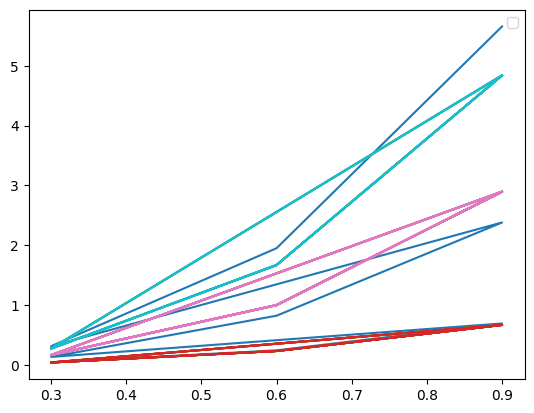

In [13]:
model = [calculate_flow_rate(i, a, b, c) for i in diameter]

plt.plot(diameter, flow)
plt.plot(diameter, model)
plt.legend()
plt.show()

## Task 2



In [16]:
def polynomial(x):
    return x**5 - 2*x**4

In [17]:
def first_derivative(x, h):
    return (polynomial(x+h) - polynomial(x)) / h

In [18]:
def second_derivative(x, h):
    return (polynomial(x + h) - 2 * polynomial(x) + polynomial(x - h)) / h**2

In [19]:
a = 0.2
b = 0.6
hs = np.logspace(-10, -1, num=100)

In [20]:
exact_first_derivative = 5 * a**4 - 8 * a**3
exact_second_derivative = 20 * a**3 - 48 * a**2

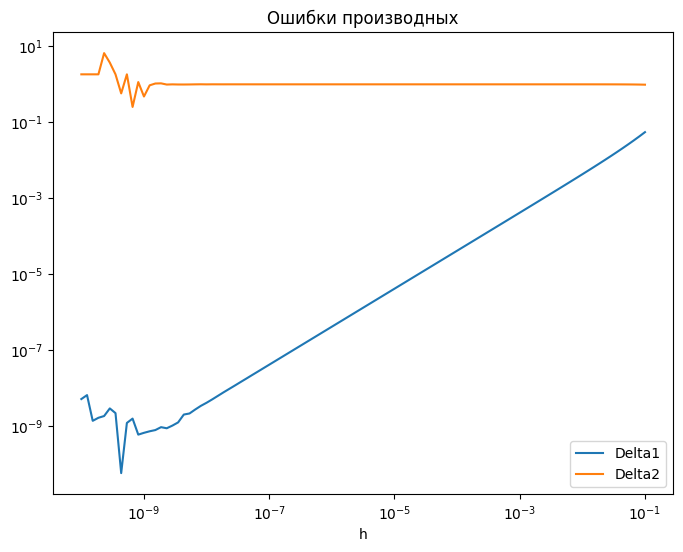

In [21]:
delta_first_derivative = []
delta_second_derivative = []
for h in hs:
    delta_first_derivative.append(abs(exact_first_derivative - first_derivative(a, h)))
    delta_second_derivative.append(abs(exact_second_derivative - second_derivative(a, h)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(hs, delta_first_derivative, label='Delta1')
ax.plot(hs, delta_second_derivative, label='Delta2')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('h')
ax.set_title('Ошибки производных')
ax.legend()
plt.show()

## Задание 3


In [22]:
def integrand(t):
    return np.exp(-t**2)

def erf(x):
    return 2 / np.sqrt(np.pi) * integrate.quad(integrand, 0, x)[0]

In [23]:
def erf_Trapezoid(x, n=100):
    t = np.linspace(0, x, n+1)
    y = integrand(t)
    y[0] /= 2
    y[-1] /= 2
    h = x / n
    return 2 / np.sqrt(np.pi) * h * np.sum(y)

In [24]:
def erf_Simpson(x, n=100, h=0.01):
    t = np.linspace(0, x, n+1)
    y = np.exp(-t**2)
    y[0] /= 2
    y[-1] /= 2
    
    integral = y.sum() * h
    for i in range(1, n, 2):
        integral += 4 * y[i] * h
    for i in range(2, n-1, 2):
        integral += 2 * y[i] * h
    
    return 2 / np.sqrt(np.pi) * integral

In [26]:
x = np.arange(0, 4.01, 0.01)
y1 = np.array([erf_Trapezoid(i) for i in x])
y2 = np.array([erf_Simpson(i) for i in x])
y3 = np.array([special.erf(i) for i in x])



In [27]:
delta1 = np.abs(y1 - y3)
delta2 = np.abs(y2 - y3)


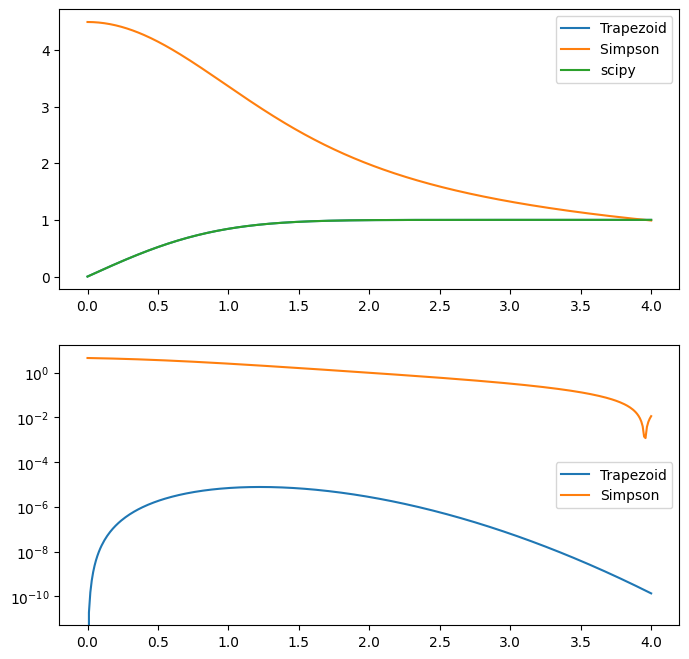

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax1.plot(x, y1, label='Trapezoid')
ax1.plot(x, y2, label='Simpson ')
ax1.plot(x, y3, label='scipy')
ax1.legend()
ax2.semilogy(x, delta1, label='Trapezoid')
ax2.semilogy(x, delta2, label='Simpson')
ax2.legend()
plt.show()
  